In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import cv2

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

if not os.path.isdir('models'):
    os.mkdir('models')

In [12]:
df  = pd.read_csv("/content/drive/My Drive/dance form prediction/train.csv")
df.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [25]:
WIDTH = 224
HEIGHT = 224
image_dataset = []
for i in range(0,len(df['Image'])):
    path = os.path.join('/content/drive/My Drive/dance form prediction/train/',df['Image'][i]) 
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(WIDTH,WIDTH))
  # full_size_image = np.array(Image.open('/content/drive/My Drive/dance form prediction/train/' + df['Image'][i]))
    image_dataset.append(cv2.resize(img, (WIDTH,HEIGHT)))
x_train = np.array(image_dataset)

In [26]:
x_train.shape

(364, 224, 224, 3)

In [27]:
y_train_d = df['target']
values = np.array(y_train_d)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train = onehot_encoder.fit_transform(integer_encoded)
x_train = x_train / 255
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(291, 224, 224, 3) (291, 8) (73, 224, 224, 3) (73, 8)


In [28]:
augs_gen = ImageDataGenerator(
            zoom_range=0.2, 
            rotation_range=10,
            width_shift_range=0.3, 
            height_shift_range=0.3,
             shear_range=0.4,
             horizontal_flip=True,
              fill_mode='nearest',
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        ) 

augs_gen.fit(x_train)

In [29]:
ct=0
imgsize = 224
base = keras.applications.Xception(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')
base.summary()

model =  keras.models.Sequential()
model.add(base)
for layer in base.layers:
  ct=ct+1

for layer in base.layers:
  if ct>10:
    layer.trainable = False
  else:
    layer.trainable = True
  ct=ct-1

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu' ))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=1e-3),
    metrics=['accuracy']
)


model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=32),
    validation_data  = (x_test,y_test),
    epochs =325, 
    verbose = 1,
)

Epoch 1/325
10/10 [==============================] - 12s 1s/step - loss: 7.2922 - accuracy: 0.1443 - val_loss: 3.2926 - val_accuracy: 0.0685
Epoch 2/325
10/10 [==============================] - 6s 609ms/step - loss: 2.0785 - accuracy: 0.1375 - val_loss: 2.3358 - val_accuracy: 0.0685
Epoch 3/325
10/10 [==============================] - 6s 613ms/step - loss: 2.0774 - accuracy: 0.1375 - val_loss: 2.2036 - val_accuracy: 0.0685
Epoch 4/325
10/10 [==============================] - 6s 613ms/step - loss: 2.0795 - accuracy: 0.1375 - val_loss: 2.1654 - val_accuracy: 0.0685
Epoch 5/325
10/10 [==============================] - 6s 615ms/step - loss: 2.0749 - accuracy: 0.1443 - val_loss: 2.4241 - val_accuracy: 0.0959
Epoch 6/325
10/10 [==============================] - 6s 619ms/step - loss: 2.0719 - accuracy: 0.1375 - val_loss: 2.2702 - val_accuracy: 0.1370
Epoch 7/325
10/10 [==============================] - 6s 618ms/step - loss: 2.0863 - accuracy: 0.1478 - val_loss: 2.1699 - val_accuracy: 0.1507
E

In [43]:
#image classification models
# ResNet50
# ResNet152
# InceptionV3
# VGG16
# DenseNet169
# DenseNet201
# DenseNet121
# Xception

In [32]:
df1  = pd.read_csv("/content/drive/My Drive/dance form prediction/test.csv")
df1.head()
WIDTH = 224
HEIGHT = 224
X_test = []
for i in range(0,len(df1['Image'])):
    path = os.path.join('/content/drive/My Drive/dance form prediction/test/',df1['Image'][i]) 
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(WIDTH,WIDTH))
  # full_size_image = np.array(Image.open('/content/drive/My Drive/dance form prediction/train/' + df['Image'][i]))
    X_test.append(cv2.resize(img, (WIDTH,HEIGHT)))
X_test = np.array(X_test)

In [33]:
X_test.shape

(156, 224, 224, 3)

[[5.5025402e-26 7.5518520e-31 0.0000000e+00 3.5066807e-21 4.4700500e-35
  9.6523257e-33 1.0000000e+00 1.6383422e-26]]
odissi


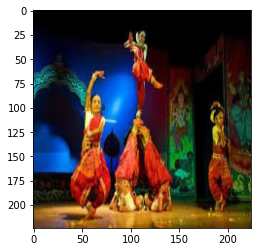

In [38]:
category_to_label = {0 : 'bharatanatyam', 1 :'kathak' , 2 : 'kathakali',3 :'kuchipudi' ,4 :'manipuri' ,5 : 'mohiniyattam',6 :'odissi' ,7 :'sattriya' }
imageNum = 3
plt.imshow(X_test[imageNum])
image = np.expand_dims(X_test[imageNum], axis=0)
sd = model.predict(image/255)                        # divide by 255 is must
print(sd)
arg = np.argmax(sd)
print(category_to_label[arg])

In [42]:
import csv
import statistics 
from statistics import mode 
num = X_test.shape[0]
with open('/content/drive/My Drive/dance form prediction/test1.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "target"])
    for ind in range(num):
        image = np.expand_dims(X_test[ind], axis=0)
        sd = model.predict(image/255)
        arg = np.argmax(sd)
        writer.writerow([df1['Image'][ind] ,category_to_label[arg]])